# 기술통계 > 기초통계량

## 1. 기술통계
- 기술통계란, 자료를 `그래프나 숫자등으로 요약`하는 통계적 행위 및 관련 방법을 의미
- 데이터 분석에 앞서 전체적으로 데이터의 특징을 파악하고 데이터를 다양한 각도로 접근
- 데이터를 요약하고 시각화해서 잘 설명하는 것에 중점을 두며 데이터에 대해 쉽게 설명하기 위해 시각화를 많이 활용
- 시각화 자료들: `박스플롯(상자그림)`, `도수분포표`, `히스토그램`
- 사실을 객관적으로 확인하는 것을 중점으로 함

## 2. 기술통계 절차
### 1) 데이터 전체 크기, 형태 확인
- 행/열 수 확인
    - `데이터.shape`
- 10만건의 데이터 전체를 출력하는 것은 매우 부담이 큰 처리이므로 상위 n건, 하위 n건의 일부만 확인
    - `데이터프레임.head(n)`
### 2) 수치형 데이터
#### 1> 집단의 특성을 잘 나타내는 요약 통계량 확인
- 평균, 중앙값, 표준편차, 범위(max~min), 사분위수 등 확인
- 요약통계량을 상자그림으로 시각화하여 확인
### 3) 범주형 데이터
- 데이터의 빈도수 확인

## 3. 작업 준비
### 1) 패키지 참조

In [23]:
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

### 2) 데이터 가져오기

In [24]:
df = read_excel("https://data.hossam.kr/D02/ad-sales.xlsx", index_col="월")
df

,광고비(백만원),매출액(억원)
월,,
1월,2,100
2월,142,1690
3월,122,298
4월,130,390
5월,185,590
6월,121,200
7월,101,190
8월,199,460
9월,221,660


### 3) 데이터 전처리

In [25]:
df.rename(columns={'광고비(백만원)': 'adv', '매출액(억원)': 'sales'}, inplace=True)
df.index.name = 'month'
df

,adv,sales
month,,
1월,2,100
2월,142,1690
3월,122,298
4월,130,390
5월,185,590
6월,121,200
7월,101,190
8월,199,460
9월,221,660


## 4. 기초통계량
### 1) 데이터의 범위
- `최대값 ~ 최소값`의 구간 의미

In [26]:
max_adv = df['adv'].max()
min_adv = df['adv'].min()
print("광고비 구간은 {min}~{max}백만원 입니다.".format(max = max_adv, min=min_adv))

max_sales = df['sales'].max()
min_sales = df['sales'].min()
print("매출액 구간은 {min}~{max}억원 입니다.".format(max = max_sales, min=min_sales))

광고비 구간은 2~237백만원 입니다.
매출액 구간은 100~1690억원 입니다.


### 2) 합계

In [27]:
sum_adv = df['adv'].sum()
sum_sales = df['sales'].sum()
print("광고비의 총 합은 %d백만원이고, 매출액의 총 합은 %d억원 입니다." % (sum_adv, sum_sales))

광고비의 총 합은 1768백만원이고, 매출액의 총 합은 6458억원 입니다.


### 3) 평균
- : 특정 값이 다른 값들의 범위와 차이가 큰 경우 신뢰도가 떨어짐
- 위의 데이터에서 100에 해당하는 값은 다른 값들에 비해 극단적으로 높음 -> 이러한 값을 극단치라고 함

In [28]:
mean_adv = df['adv'].mean()
mean_sales = df['adv'].mean()
print("광고비의 평균은 %d백만원이고, 매출액의 평균은 %d억원 입니다." % (mean_adv, mean_sales))

광고비의 평균은 147백만원이고, 매출액의 평균은 147억원 입니다.


### 4) 중앙값 ($m_e$)
- 모든 값을 순서대로 정렬한 후 가운데 위치의 값
- 평균의 신뢰도가 현저히 낮을 경우 데이터의 분포를 확인하기 위해 사용

#### 데이터의 수가 홀수인 경우
- 모든 값을 순서대로 정렬한 후 `가운데 위치의 값`
- `1, 2, 3, 4, 5` 의 중앙값은 `3`
- $m_e = x{(\frac{n+1}2)}$

#### 데이터의 수가 짝수개인 경우
- 모든 값을 순서대로 정렬한 후 `가운데 두 값의 평균`
- `1, 2, 3, 4, 5, 6`의 중앙값은 `(3+4)/2`이므로 `3.5`이다.
- $m_e = \frac{1}{2}{({x_{\frac{n}{2}} + {x_{\frac{n}{2}+1}}})}$

In [29]:
median_adv = df['adv'].median()
median_sales = df['sales'].median()
print("광고비의 중앙값은 %d백만원이고, 매출액의 중앙값은 %d억원 입니다." % (median_adv, median_sales))

광고비의 중앙값은 140백만원이고, 매출액의 중앙값은 425억원 입니다.


### 5) 사분위 수
- 데이터 표본을 4개의 동일한 부분으로 나눈 값
- 사분위수를 사용하여 데이터 집합의 범위와 중심 위치를 신속하게 평가할 수 있음
- 이는 데이터를 이해하는 데 중요한 첫 번째 단계
- 종류

| 용어               | 설명                                                   |
| ------------------ | ---------------------------------------------------- |
| 1사분위 수(Q1)     | 데이터의 하위 25%가 이 값보다 작거나 같음.             |
| 2사분위 수(Q2)     | 중위수 데이터의 50%가 이 값보다 작거나 같음. (=중앙값) |
| 3사분위 수(Q3)     | 데이터의 하위 75%가 이 값보다 작거나 같음.(=상위 25%)  |
| 사분위간 범위(IQR) | 3사분위 수부터 1사분위 수 구간                         |
- 사분위수는 데이터의 관측치가 아닌 `계산된 값`
- 실존하지 않는 값이기 때문에 사분위수를 정확하게 계산하려면 종종 두 관측치 사이를 보간해야 함
- 중위수와 사분위간 범위는 극단치의 영향을 받지 않기 때문에 평균 및 표준 편차보다 치우침이 많은 데이터의 중심 위치와 범위의 더 나은 측도가 될 수 있음

#### 1> 1사분위 수

$Q_1 = ((총도수 + 1) \times 0.25)+1$

In [30]:
# 사분위 수의 위치
adv = list(df['adv'])
총도수 = len(adv)
Q1 = ((총도수 + 1) * 0.25) + 1
print(Q1)

# 사분위 수의 실제 값
print(df['adv'].quantile(q=0.25))

4.25
121.75


#### 2> 2사분위 수
- 중앙값과 동일

In [31]:
df['adv'].quantile(q=0.5)

140.5

#### 3> 3사분위 수

$Q_3 = ((총도수 + 1) \times 0.75)+1$

In [32]:
adv = list(df['adv'])
총도수 = len(adv)
Q3 = ((총도수 + 1) * 0.75) + 1
print(Q3)

print(df['adv'].quantile(q=0.75))

10.75
188.5


#### 4> 사분위간 범위

$Q3 - Q1$

In [33]:
print(df['adv'].quantile(q=0.75) - df['adv'].quantile(q=0.25))

66.75


### 6) 분산, 표준편차

In [34]:
분산 = df['adv'].var()
print("광고비의 분산은 %f" % 분산)

표준편차 = df['adv'].std()
print("광고비의 표준편차는 %f" % 표준편차)

광고비의 분산은 3911.515152
광고비의 표준편차는 62.542107


### 7) 기초통계량 일괄 산출

#### 기초통계량 데이터프레임 생성
- `데이터프레임.describe(percentiles = None, include = None, exclude = None)`
    - Generate descriptive statistics.
    - `Descriptive statistics` include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, `excluding NaN values`.
    - Analyzes `both numeric and object series`, as well as `DataFrame column sets of mixed data types`
    - The output will vary depending on what is provided
    - Parameters:
        - `percentiles`: list-like of numbers, `optional`
            - The percentiles to include in the output. All should fall between 0 and 1
            - default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles
        - `include`: ‘all’, list-like of dtypes or None (default), `optional`
            - A white list of data types to include in the result. 
            - Ignored for Series. 
            - Here are the options:
                - ‘all’ : All columns of the input will be included in the output.
                - A list-like of dtypes : Limits the results to the provided data types. To limit the result to numeric types submit numpy.number. To limit it instead to object columns submit the numpy.object data type. Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O'])). To select pandas categorical columns, use 'category'
                - None (default) : The result will include all numeric columns.
        - `exclude`: list-like of dtypes or None (default), `optional`
            - A black list of data types to omit from the result. 
            - Ignored for Series. 
            - Here are the options:
                - A list-like of dtypes : Excludes the provided data types from the result. To exclude numeric types submit numpy.number. To exclude object columns submit the data type numpy.object. Strings can also be used in the style of select_dtypes (e.g. df.describe(exclude=['O'])). To exclude pandas categorical columns, use 'category'
                - None (default) : The result will exclude nothing.
    - `Returns`: Series or DataFrame
        - Summary statistics of the Series or Dataframe provided.

In [35]:
desc = df.describe()
desc

,adv,sales
count,12.000000,12.000000
mean,147.333333,538.166667
std,62.542107,428.774540
min,2.000000,100.000000
25%,121.750000,273.500000
50%,140.500000,425.000000
75%,188.500000,652.500000
max,237.000000,1690.000000


##### 데이터프레임의 전치 구하기

In [36]:
desc.T

,count,mean,std,min,25%,50%,75%,max
adv,12.0,147.333333,62.542107,2.0,121.75,140.5,188.5,237.0
sales,12.0,538.166667,428.774540,100.0,273.50,425.0,652.5,1690.0


## 5. 기초통계량 시각화
- 상자그림`.boxplot()`은 데이터의 범위 및 분포, 사분위 수, 이상치 등을 시각화 한 그래프
- `.grid()` 표시하고자 하면 반드시 `.boxplot() 전`에 표시해야 됨:
    - 순서: 
        - .grid()
        - .boxplot()

### 1) 그래프 전역 설정

In [37]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

### 2) 모든 컬럼에 대한 일괄 생성

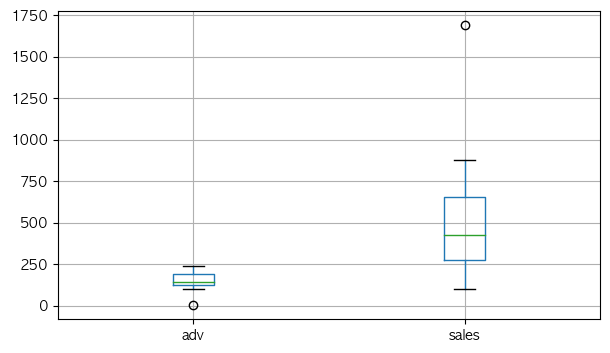

In [38]:
plt.figure()
plt.grid()      # 격자를 표시하고자 하는 경우 반드시 boxplot() 함수보다 먼저 표시해야 함    
df.boxplot()
plt.show()
plt.close()

### 3) 특정 컬럼만 시각화

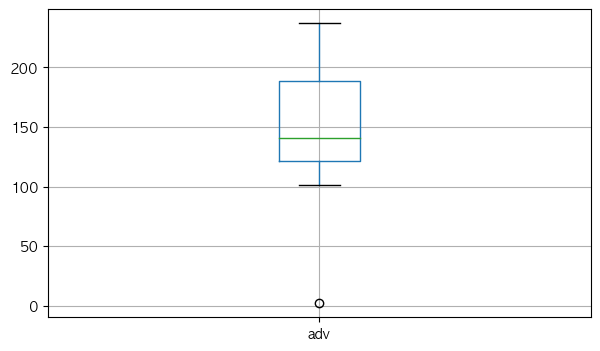

In [39]:
plt.figure()
plt.grid()
df.boxplot(['adv'])
plt.show()
plt.close()

### 4. 서브플롯을 활용한 상자그림

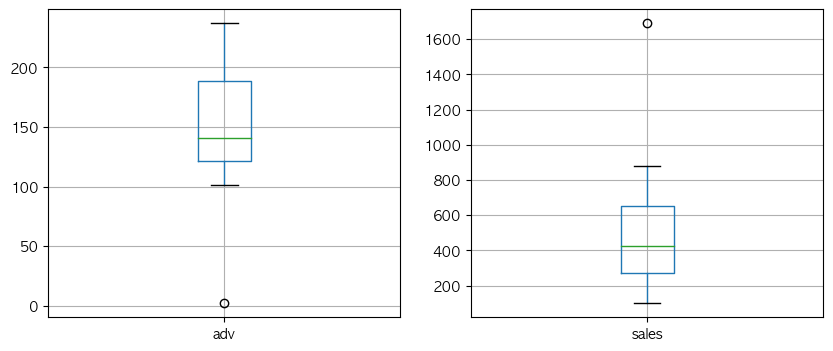

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
df.boxplot(['adv'], ax = ax1)
df.boxplot(['sales'], ax = ax2)
plt.show()
plt.close()

### 5. seaborn을 사용한 상자그림

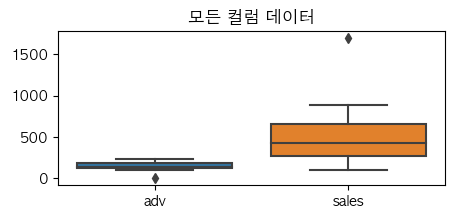

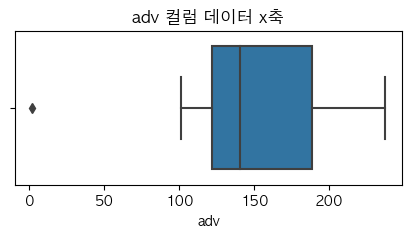

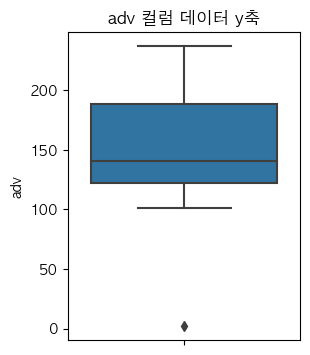

In [41]:
plt.rcParams['figure.figsize']=(5, 2)
plt.figure()
plt.title('모든 컬럼 데이터')
sb.boxplot(data=df)
plt.show()
plt.close()

plt.figure()
plt.title('adv 컬럼 데이터 x축')
sb.boxplot(data = df, x = 'adv')
plt.show()
plt.close()

plt.rcParams['figure.figsize']=(3, 4)
plt.figure()
plt.title('adv 컬럼 데이터 y축')
sb.boxplot(data = df, y = 'adv')
plt.show()
plt.close()

               주가
count   24.000000
mean   153.000000
std     24.354269
min    102.000000
25%    142.750000
50%    150.000000
75%    163.500000
max    235.000000


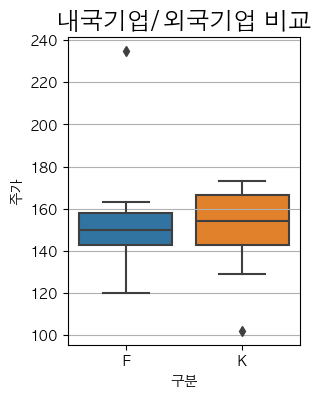

Insight: 외국 기업의 주가보다 내국 기업의 주가의 범위가 더 넓다.


In [42]:
data = read_excel('https://data.hossam.kr/D02/stock.xlsx')
data

print(data.describe())

plt.figure()
plt.grid() 
sb.boxplot(x='구분',y='주가',data=data)
plt.title('내국기업/외국기업 비교',fontsize=17)
plt.show()
plt.close()
print("Insight: 외국 기업의 주가보다 내국 기업의 주가의 범위가 더 넓다.")

## 6. 극단치 경계
- 데이터가 극단적으로 크거나 작은 값을 극단치(=이상치)라고 함
- 그 값을 결정하는 기준이 되는 값을 극단치 경계

### IQR
- 1사분위수와 3사분위수의 거리
$IQR = Q3 - Q1$

### 상한 극단치 경계
$상한 = Q3 + IQR * 1.5$

### 하한 극단치 경계
$하한 = Q1 - IQR * 1.5$

### 광고비에 대한 이상치 구하기

In [43]:
print(df)

q1 = df['adv'].quantile(q=0.25)
q3 = df['adv'].quantile(q=0.75)
iqr = q3 - q1
하한 = q1 - iqr * 1.5
print('광고비에 대한 하한 극단치 경계값: %f' % 하한)

df1 = df.query('adv < @ 하한')
print(df1['adv'])

       adv  sales
month            
1월       2    100
2월     142   1690
3월     122    298
4월     130    390
5월     185    590
6월     121    200
7월     101    190
8월     199    460
9월     221    660
10월    139    350
11월    169    650
12월    237    880
광고비에 대한 하한 극단치 경계값: 21.625000
month
1월    2
Name: adv, dtype: int64


### 매출액에 대한 이상치 구하기

In [44]:
q1 = df['sales'].quantile(q=0.25)
q3 = df['sales'].quantile(q=0.75)
iqr = q3 - q1
상한 = q3 + iqr * 1.5
print('매출액에 대한 상한 극단치 경계값: %f' % 상한)

df2 = df.query('sales > @상한')
print(df2['sales'])

매출액에 대한 상한 극단치 경계값: 1221.000000
month
2월    1690
Name: sales, dtype: int64
